In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk.corpus import wordnet as wn

In [2]:
from zipfile import ZipFile

In [3]:
data = ZipFile('/content/drive/MyDrive/archive.zip')

In [4]:
data.extractall()

In [5]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1",names = ['target','ids','date','flag','user','text'])

In [6]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
data.tail()

,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
data.shape

(1600000, 6)

In [10]:
x_train = data['text'].values
y_train = data['target'].values

In [11]:
x_train

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [12]:
y_train = [[1,0] if x == 4 else [0,1] for x in y_train]

In [13]:
y_train[0]

[0, 1]

In [14]:
import re
def clean_text(text):
  if type(text)!=str:
    return str(text)
  return re.sub(r'[^0-9A-Za-z" "]','',text)

In [15]:
x_train = [clean_text(here) for here in x_train]
save =[]
for each_sentence in x_train:
  save.append(each_sentence.split(" "))

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())
adjwords = set([x for x in words if len(wn.synsets(x)) > 0 and wn.synsets(x)[0].pos() in ['n', 'v', 'a', 's']])  

In [18]:
x_train = []
for each_sentence in save:
  filtered_sentence = [lemmatizer.lemmatize(x.lower()) for x in each_sentence if x.lower() not in stop_words]
  x_train.append(" ".join([x for x in filtered_sentence if x in adjwords]))   

In [19]:
x_train

['bummer got third day',
 'upset cant update might cry result school today blah',
 'many time ball save rest go bound',
 'whole body feel itchy like fire',
 'mad cant see',
 'whole crew',
 'need hug',
 'long time see yes rain bit bit fine thanks',
 '',
 '',
 'spring break plain city',
 'ear',
 'bear watch thought loss embarrassing',
 'count talk',
 'first gun',
 'wish got watch miss premiere',
 'death scene hurt watch film wry director cut',
 'file tax',
 'see rent love',
 'oh dear drinking forgotten table drink',
 'day get much done',
 'one friend meet mid valley time sigh',
 'baked cake',
 'week going hoped',
 'class tomorrow',
 'hate call wake people',
 'going cry sleep watching',
 'sad',
 'wont wont get mad',
 'lover exception track get depressed every time',
 'hacked account aim make new one',
 'want go promote gear groove ride may b going one may',
 'thought sleeping option tomorrow realizing evaluation morning work afternoon',
 'awe love miss',
 'cry eye sleep night',
 'sick spe

In [20]:
y_train[:10]

[[0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1]]

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [22]:
word_index = tokenizer.word_index

In [23]:
word_index

{'day': 1,
 'good': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'u': 6,
 'love': 7,
 'work': 8,
 'today': 9,
 'going': 10,
 'time': 11,
 'cant': 12,
 'got': 13,
 'back': 14,
 'one': 15,
 'know': 16,
 'want': 17,
 'see': 18,
 'well': 19,
 'think': 20,
 'night': 21,
 'still': 22,
 'new': 23,
 'need': 24,
 'thanks': 25,
 'home': 26,
 'oh': 27,
 'miss': 28,
 'much': 29,
 'last': 30,
 'feel': 31,
 'make': 32,
 'hope': 33,
 'morning': 34,
 'tomorrow': 35,
 'great': 36,
 'twitter': 37,
 'ill': 38,
 'wish': 39,
 'sad': 40,
 'come': 41,
 'fun': 42,
 'right': 43,
 'week': 44,
 'sleep': 45,
 'bad': 46,
 'happy': 47,
 'thing': 48,
 'sorry': 49,
 'tonight': 50,
 'friend': 51,
 'way': 52,
 'getting': 53,
 'look': 54,
 'nice': 55,
 'better': 56,
 'watching': 57,
 'say': 58,
 'wait': 59,
 'hate': 60,
 'bed': 61,
 'people': 62,
 'school': 63,
 'hour': 64,
 'guy': 65,
 'yes': 66,
 'weekend': 67,
 'even': 68,
 'take': 69,
 'next': 70,
 'show': 71,
 'awesome': 72,
 'thank': 73,
 'tweet': 74,
 'let': 75,
 'little

In [24]:
x_train = tokenizer.texts_to_sequences(x_train)

In [25]:
max_len = max(len(sentences) for sentences in x_train)

In [26]:
x_train = pad_sequences(x_train,maxlen=10)

In [27]:
len(x_train[0])

10

In [28]:
wordvec = word2vec.Word2Vec(save,size=30)

In [29]:
from collections import defaultdict
def create_word_embedding(wordvec,word_index):
  word_embedding = defaultdict()
  for x,y in word_index.items():
    
    try:
      word_embedding[y] = np.array(wordvec[x])
    except:
      word_embedding[y] = np.zeros(30)
    
  return word_embedding


In [30]:
word_embedding = create_word_embedding(wordvec,word_index)
word_embedding[0] = np.zeros(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [31]:
x_train = [[word_embedding[x] for x in here] for here in x_train]

In [32]:
len(x_train)

1600000

In [33]:
dic = defaultdict(lambda:0)
for x in x_train:
  for z in x:
    dic[len(z)] += 1

In [34]:
dic

defaultdict(<function __main__.<lambda>>, {30: 16000000})

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [52]:
model = keras.Sequential()

In [53]:
model.add(keras.layers.Conv1D(kernel_size=3,input_shape = (10,30),filters = 64))

In [54]:
model.add(keras.layers.LSTM(64))

In [55]:
model.add(keras.layers.Flatten())

In [56]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [57]:
model.compile(loss = keras.losses.binary_crossentropy,optimizer = 'adam',metrics=['acc'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 64)             5824      
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 38,978
Trainable params: 38,978
Non-trainable params: 0
_________________________________________________________________


In [43]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [44]:
print(x_train.shape,x_test.shape)

(1280000, 10, 30) (320000, 10, 30)


In [45]:
x_train = x_train.reshape(x_train.shape[0], 10, 30,1)
x_test = x_test.reshape(x_test.shape[0], 10 , 30 ,1)

In [46]:
x_train.shape

(1280000, 10, 30, 1)

In [47]:
x_test.shape

(320000, 10, 30, 1)

In [48]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [61]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
10000/10000 [==============================] - 226s 22ms/step - loss: 0.5304 - acc: 0.7271 - val_loss: 0.5231 - val_acc: 0.7324
Epoch 2/10
10000/10000 [==============================] - 210s 21ms/step - loss: 0.5180 - acc: 0.7368 - val_loss: 0.5212 - val_acc: 0.7355
Epoch 3/10
10000/10000 [==============================] - 206s 21ms/step - loss: 0.5142 - acc: 0.7399 - val_loss: 0.5184 - val_acc: 0.7365
Epoch 4/10
10000/10000 [==============================] - 184s 18ms/step - loss: 0.5119 - acc: 0.7415 - val_loss: 0.5177 - val_acc: 0.7382
Epoch 5/10
10000/10000 [==============================] - 205s 20ms/step - loss: 0.5103 - acc: 0.7428 - val_loss: 0.5156 - val_acc: 0.7393
Epoch 6/10
10000/10000 [==============================] - 192s 19ms/step - loss: 0.5092 - acc: 0.7438 - val_loss: 0.5155 - val_acc: 0.7392
Epoch 7/10
10000/10000 [==============================] - 205s 20ms/step - loss: 0.5084 - acc: 0.7440 - val_loss: 0.5160 - val_acc: 0.7390
Epoch 8/10
10000/10000 [===

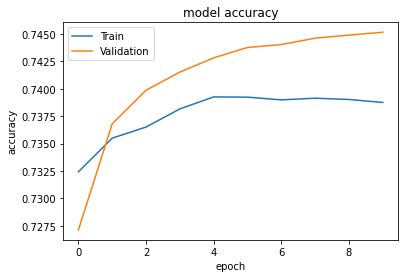

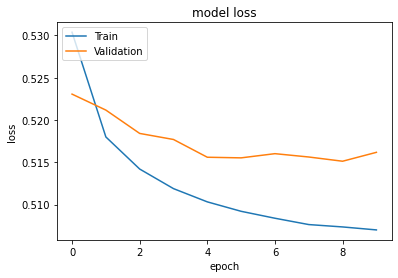

In [62]:
history = model.history.history
plt.plot(history['val_acc'])
plt.plot(history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [63]:
import pickle as pkl
pkl.dump(model,open('save_model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://a1194c1d-bc0a-45f5-ba52-f28fb6610dc8/assets


INFO:tensorflow:Assets written to: ram://a1194c1d-bc0a-45f5-ba52-f28fb6610dc8/assets


In [64]:
pkl.dump(word_embedding,open('word_embeddings.pkl','wb'))

In [65]:
len(word_embedding)

24778

In [66]:
pkl.dump(word_index,open('word_index.pkl','wb'))

In [67]:
pkl.dump(wordvec,open('wordvec.pkl','wb'))

In [68]:
import shutil

In [69]:
source = '/content/save_model.pkl'
target = '/content/drive/MyDrive/save_model_twitter.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/save_model_twitter.pkl'

In [70]:
source = '/content/word_embeddings.pkl'
target = '/content/drive/MyDrive/word_embeddings_twitter.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/word_embeddings_twitter.pkl'

In [71]:
source = '/content/word_index.pkl'
target = '/content/drive/MyDrive/word_index_twitter.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/word_index_twitter.pkl'

In [72]:
source = '/content/wordvec.pkl'
target = '/content/drive/MyDrive/wordvec_twitter.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/wordvec_twitter.pkl'

In [73]:
shutil.copyfile(source,target)

'/content/drive/MyDrive/wordvec_twitter.pkl'

In [74]:
keras.__version__

'2.8.0'

In [75]:
tf.__version__

'2.8.2'